<a href="https://colab.research.google.com/github/Saileshmurali/Machine-Learning/blob/main/Handwritten-Digit-CNN/Digit_2_CNN_Without_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import itertools
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical #one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


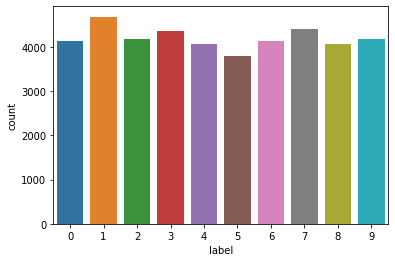

In [ ]:
train = pd.read_csv("train.csv")
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
sns.countplot(Y_train)

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=123)

In [ ]:
model = Sequential()


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

In [ ]:
datagen = ImageDataGenerator(
        rescale=1.0/255,
)
validgen=ImageDataGenerator(
    rescale=1.0/255
)

In [ ]:
epochs = 10
batch_size = 86

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, 
                              validation_data=validgen.flow(X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
390/390 - 72s - loss: 0.6515 - accuracy: 0.7793 - val_loss: 0.1047 - val_accuracy: 0.9706
Epoch 2/10
390/390 - 71s - loss: 0.1729 - accuracy: 0.9501 - val_loss: 0.0705 - val_accuracy: 0.9799
Epoch 3/10
390/390 - 71s - loss: 0.1214 - accuracy: 0.9660 - val_loss: 0.0554 - val_accuracy: 0.9848
Epoch 4/10
390/390 - 70s - loss: 0.0966 - accuracy: 0.9730 - val_loss: 0.0579 - val_accuracy: 0.9845
Epoch 5/10
390/390 - 69s - loss: 0.0825 - accuracy: 0.9766 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 6/10
390/390 - 69s - loss: 0.0750 - accuracy: 0.9784 - val_loss: 0.0376 - val_accuracy: 0.9889
Epoch 7/10
390/390 - 68s - loss: 0.0641 - accuracy: 0.9821 - val_loss: 0.0421 - val_accuracy: 0.9876
Epoch 8/10
390/390 - 68s - loss: 0.0565 - accuracy: 0.9836 - val_loss: 0.0305 - val_accuracy: 0.9914
Epoch 9/10
390/390 - 68s - loss: 0.0571 - accuracy: 0.9838 - val_loss: 0.0329 - val_accuracy: 0.9911
Epoch 10/10
390/390 - 68s - loss: 0.0555 - accuracy: 0.9842 - val_loss: 0.0305 - val_accura

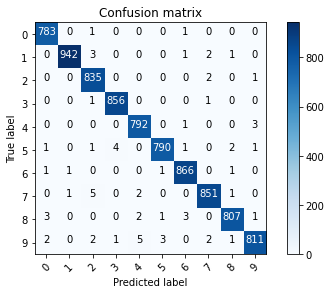

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx =confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
print(classification_report(Y_pred_classes,Y_true))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       790
           1       0.99      1.00      1.00       944
           2       1.00      0.98      0.99       848
           3       1.00      0.99      1.00       861
           4       0.99      0.99      0.99       801
           5       0.99      0.99      0.99       795
           6       1.00      0.99      0.99       873
           7       0.99      0.99      0.99       858
           8       0.99      0.99      0.99       813
           9       0.98      0.99      0.99       817

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



Text(0.5, 1.0, 'Training and validation loss')

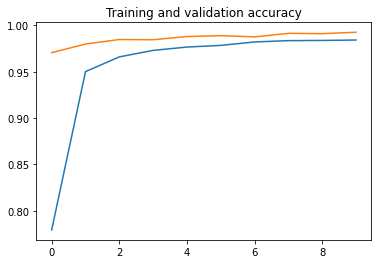

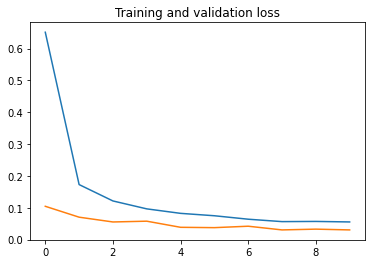

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )